In [8]:
import pandas as pd

file_path = r"C:\Users\LENOVO\.cache\kagglehub\datasets\mansoorsarookhh\silver-prices-2011-2026history-and-forecasting-data\versions\1\silver_prices_data.csv"

df = pd.read_csv(file_path)
df.head()


,Date,Close,High,Low,Open,Volume
0,2011-01-24,27.318001,27.459999,26.955000,27.174999,168
1,2011-01-25,26.811001,26.950001,26.565001,26.915001,77
2,2011-01-26,27.132000,27.025000,26.684999,27.025000,49
3,2011-01-27,27.045000,27.684999,27.410000,27.684999,184
4,2011-01-28,27.934000,27.950001,26.504999,26.695000,64


In [9]:
df.shape


(3768, 6)

In [10]:
df.columns


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3768 non-null   object 
 1   Close   3768 non-null   float64
 2   High    3768 non-null   float64
 3   Low     3768 non-null   float64
 4   Open    3768 non-null   float64
 5   Volume  3768 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.8+ KB


In [12]:
df.shape


(3768, 6)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [14]:
df.describe()


,Close,High,Low,Open,Volume
count,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000
mean,23.497272,23.684994,23.314177,23.503893,1815.771231
std,8.690819,8.845847,8.520700,8.678501,10201.389877
min,11.735000,12.205000,11.735000,12.070000,0.000000
25%,16.947750,17.017999,16.869501,16.928750,10.000000
50%,21.737000,21.864500,21.595000,21.730499,48.000000
75%,27.967750,28.126250,27.724999,27.905000,168.000000
max,91.875999,93.000000,88.705002,90.824997,170297.000000


In [15]:
#Univariate Analysis

In [16]:
#Distribution of Closing Prices

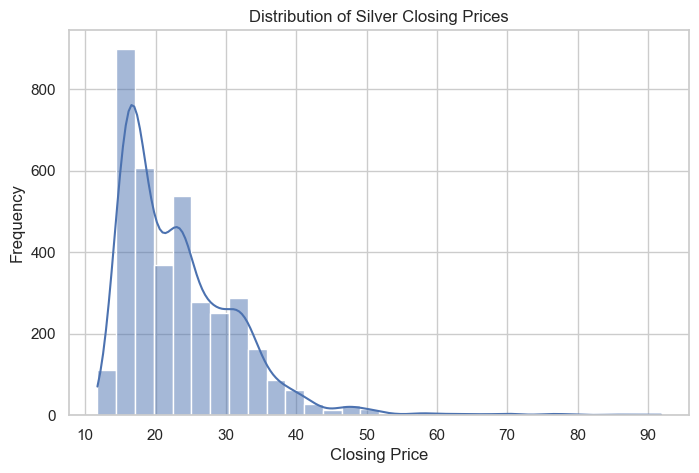

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title("Distribution of Silver Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()


In [ ]:
'''
Observation

-Right-skewed distribution

-Presence of price spikes
'''

In [18]:
#Boxplot (Outlier Detection)

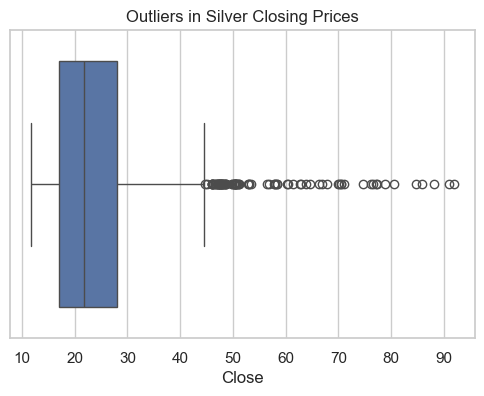

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Close'])
plt.title("Outliers in Silver Closing Prices")
plt.show()


In [23]:
'''Insight
-Extreme values align with known market surges
'''

'Insight\n-Extreme values align with known market surges\n'

In [24]:
#Time-Series Analysis

In [25]:
#Closing Price Trend Over Time

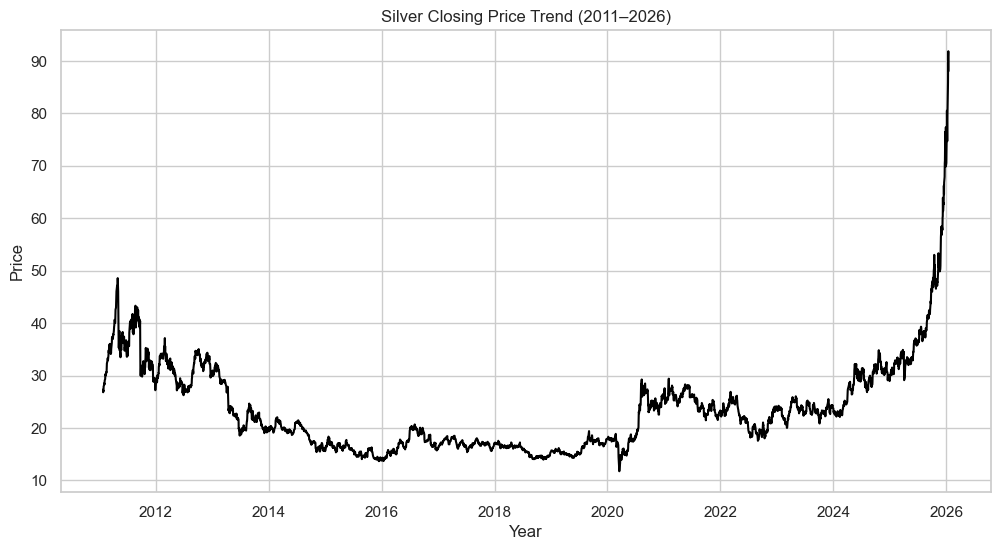

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], color='black')
plt.title("Silver Closing Price Trend (2011–2026)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


In [27]:
'''
Key Takeaways

Sharp spike around 2011

Extended consolidation phase afterward

Increased stability in recent years
'''

'\nKey Takeaways\n\nSharp spike around 2011\n\nExtended consolidation phase afterward\n\nIncreased stability in recent years\n'

In [28]:
#OHLC Price Behavior

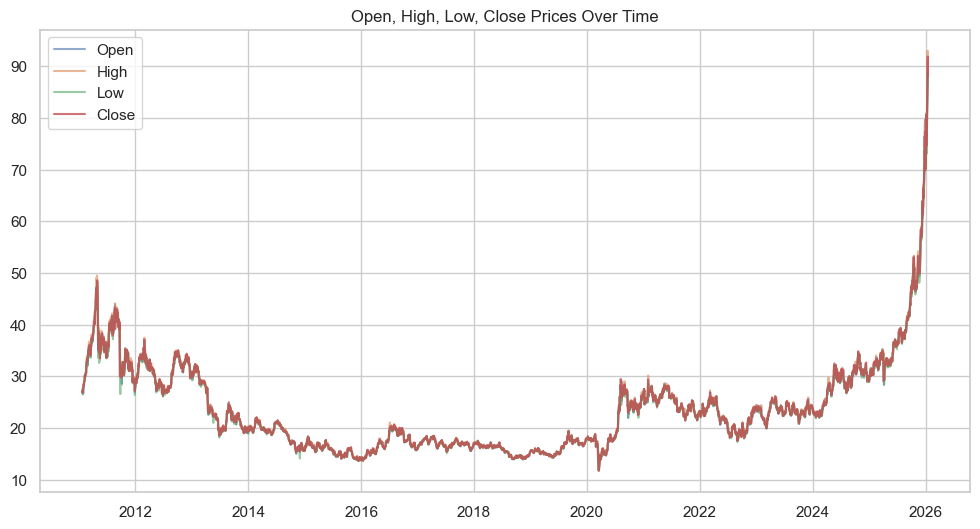

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='Open', alpha=0.6)
plt.plot(df['High'], label='High', alpha=0.6)
plt.plot(df['Low'], label='Low', alpha=0.6)
plt.plot(df['Close'], label='Close', alpha=0.8)
plt.title("Open, High, Low, Close Prices Over Time")
plt.legend()
plt.show()


In [30]:
'''
Insight

Close prices generally track within daily highs and lows

High intraday volatility during specific periods

'''

'\nInsight\n\nClose prices generally track within daily highs and lows\n\nHigh intraday volatility during specific periods\n\n'

In [31]:
#Volume Analysis

In [32]:
#Volume Traded Over Time

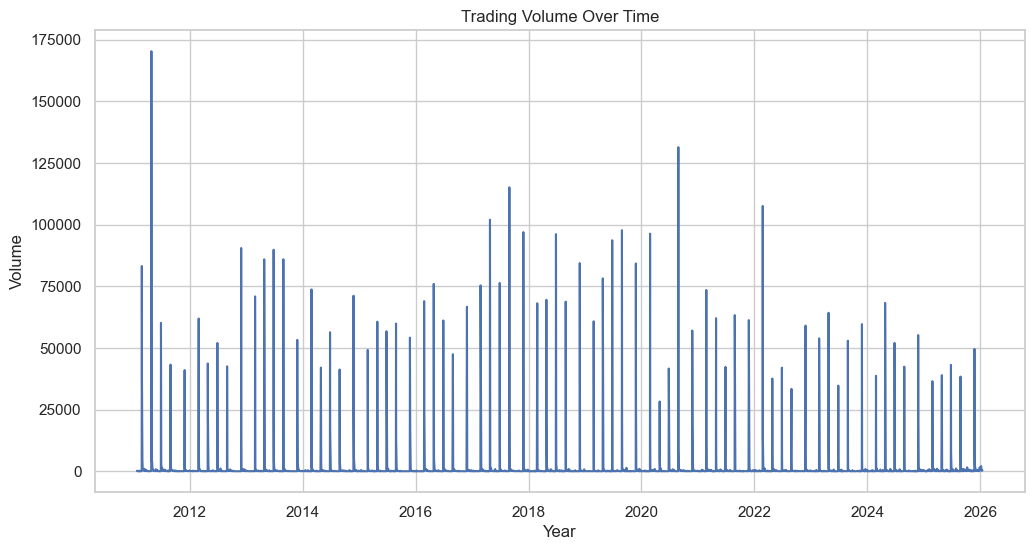

In [33]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Volume'])
plt.title("Trading Volume Over Time")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()


In [34]:
'''
Observation

Volume spikes coincide with high-volatility periods

Indicates strong market participation during price swings
'''

'\nObservation\n\nVolume spikes coincide with high-volatility periods\n\nIndicates strong market participation during price swings\n'

In [35]:
#Rolling Statistics (Volatility)
#30-Day Rolling Mean & Std

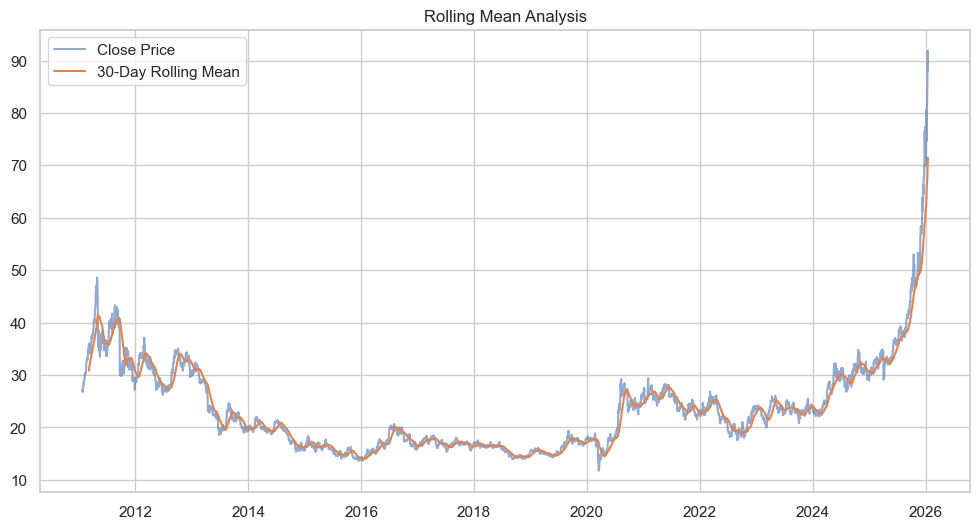

In [36]:
df['Rolling_Mean_30'] = df['Close'].rolling(30).mean()
df['Rolling_Std_30'] = df['Close'].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['Rolling_Mean_30'], label='30-Day Rolling Mean')
plt.title("Rolling Mean Analysis")
plt.legend()
plt.show()


In [37]:
'''
Insight

Rolling mean smooths short-term noise

Std highlights volatility clustering
'''

'\nInsight\n\nRolling mean smooths short-term noise\n\nStd highlights volatility clustering\n'

In [38]:
#Returns Analysis

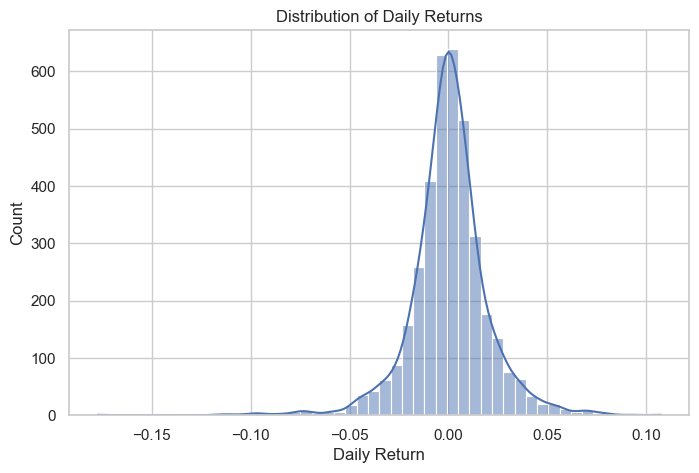

In [39]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.show()


In [40]:
'''
Key Insight

Returns centered around zero

Fat tails indicate occasional extreme movements
'''

'\nKey Insight\n\nReturns centered around zero\n\nFat tails indicate occasional extreme movements\n'

In [42]:
#Correlation Analysis

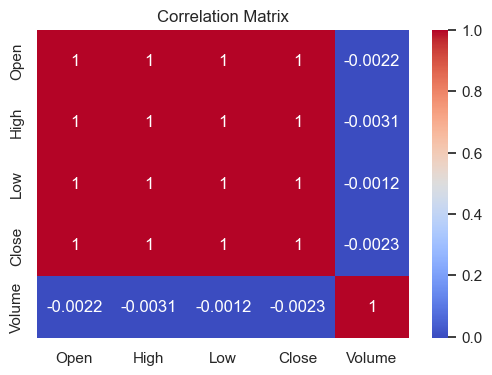

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [46]:
'''
Insights

Strong correlation between OHLC prices

Volume weakly correlated with price → driven by market events
'''

'\nInsights\n\nStrong correlation between OHLC prices\n\nVolume weakly correlated with price → driven by market events\n'